In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
netflix = pd.read_csv('netflix1.csv')
netflix[:10]
netflix1 = netflix

In [5]:
netflix1[netflix1.duplicated('title')]  #are these duplicated?

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [6]:
dup_title = ['9-Feb', '22-Jul', '15-Aug']
dup = netflix1[netflix1['title'].isin(dup_title)] #yes, it is duplicated. Just have different show_id.

In [7]:
non_dup_netflix = netflix1.drop_duplicates('title') #no more duplicates

In [8]:
non_dup_netflix['country'].value_counts() #not given is null. 

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [9]:
country = non_dup_netflix[non_dup_netflix['country'] != 'Not Given'] #no more null.

In [10]:
country['country'].value_counts()

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Canada             271
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 85, dtype: int64

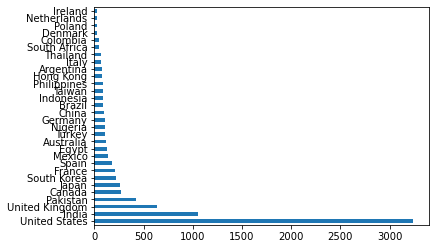

In [11]:
plot_country_30 = country['country'].value_counts()[:30].plot(kind = 'barh') 

In [12]:
non_dup_netflix['director'].value_counts() #Not given directors too!

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [13]:
clean_directors = non_dup_netflix[non_dup_netflix['director'] !='Not Given'] #clean directors

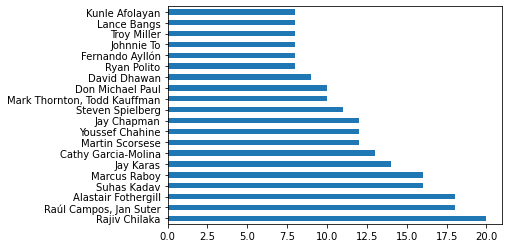

In [14]:
top_20_directors = clean_directors['director'].value_counts()[:20].plot(kind = 'barh') #most directors. Which show country too? 

In [15]:
clean_directors.groupby('country')['director'].value_counts() # why does Raúl only have 5?

country       director                             
Argentina     Raúl Campos, Jan Suter                   5
              Sebastián Schindel                       3
              Alejandro Doria                          2
              Alejandro Montiel                        2
              Israel Adrián Caetano                    2
                                                      ..
Vietnam       Nguyen Thanh Tung                        1
              Van M. Pham                              1
              Victor Vu                                1
West Germany  Joachim Fest, Christian Herrendoerfer    1
Zimbabwe      Tomas Brickhill                          1
Name: director, Length: 4688, dtype: int64

In [16]:
clean_directors[clean_directors['director'] == 'Raúl Campos, Jan Suter'] #Different places he directed. He likes movies and comedy


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3429,s5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Argentina,3/2/2018,2018,TV-MA,51 min,Stand-Up Comedy
3441,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter",Mexico,7/27/2018,2018,TV-MA,57 min,Stand-Up Comedy
3456,s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Argentina,7/6/2018,2018,TV-14,66 min,Stand-Up Comedy
3480,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Chile,6/29/2018,2018,TV-MA,77 min,Stand-Up Comedy
3507,s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Argentina,5/25/2018,2018,TV-MA,63 min,Stand-Up Comedy
3519,s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Mexico,5/11/2018,2018,TV-MA,63 min,Stand-Up Comedy
3574,s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Argentina,4/6/2018,2018,TV-MA,78 min,Stand-Up Comedy
3589,s4963,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Mexico,3/30/2018,2018,TV-MA,62 min,Stand-Up Comedy
3614,s5003,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Chile,3/2/2018,2018,TV-MA,69 min,Stand-Up Comedy
3658,s5063,Movie,Sebastián Marcelo Wainraich,"Raúl Campos, Jan Suter",Argentina,1/26/2018,2018,TV-MA,49 min,Stand-Up Comedy


In [17]:
clean_d_dates = non_dup_netflix # lets work with the dates. 
clean_d_dates

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [18]:
clean_d_dates['date_added'].dtype #looks like date_added is an object. Or it was

dtype('O')

In [19]:
clean_d_dates['date_added'] = pd.to_datetime(clean_d_dates['date_added'])

/var/folders/95/k4dp73ld2pv507gy2rvpk3n40000gn/T/ipykernel_3593/928771322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_d_dates['date_added'] = pd.to_datetime(clean_d_dates['date_added'])


In [20]:
clean_d_dates['year'] = clean_d_dates['date_added'].dt.year # error

/var/folders/95/k4dp73ld2pv507gy2rvpk3n40000gn/T/ipykernel_3593/4214161591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_d_dates['year'] = clean_d_dates['date_added'].dt.year # error


<AxesSubplot:>

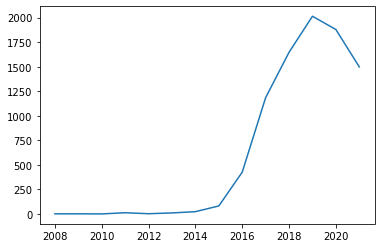

In [21]:
clean_d_dates['year'].value_counts().sort_index().plot.line() #Boom! Most were added from 2017 - 2019


In [22]:
#Tv vs movies. Which has more? 
#Rating
# HARD but working with listed in 

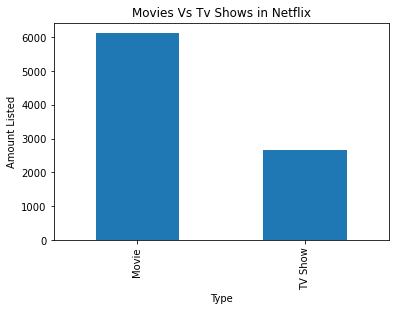

In [33]:
Movie_TV = non_dup_netflix['type'].value_counts().plot(kind = 'bar')
plt.xlabel("Type")
plt.ylabel("Amount Listed")
plt.title("Movies Vs Tv Shows in Netflix")
plt.show()

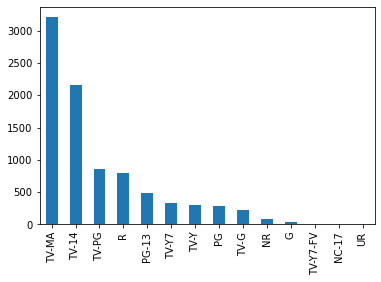

In [34]:
Rating_Amount = non_dup_netflix['rating'].value_counts().plot(kind = 'bar')